_Lambda School Data Science, Unit 2_
 
# Sprint Challenge: Predict Steph Curry's shots 🏀

For your Sprint Challenge, you'll use a dataset with all Steph Curry's NBA field goal attempts. (Regular season and playoff games, from October 28, 2009, through June 5, 2019.) 

You'll predict whether each shot was made, using information about the shot and the game. This is hard to predict! Try to get above 60% accuracy. The dataset was collected with the [nba_api](https://github.com/swar/nba_api) Python library.

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

In [1]:
# Read data
import pandas as pd
url = 'https://drive.google.com/uc?export=download&id=1fL7KPyxgGYfQDsuJoBWHIWwCAf-HTFpX'
df = pd.read_csv(url)

# Check data shape
assert df.shape == (13958, 20)

To demonstrate mastery on your Sprint Challenge, do all the required, numbered instructions in this notebook.

To earn a score of "3", also do all the stretch goals.

You are permitted and encouraged to do as much data exploration as you want.

**1. Begin with baselines for classification.** Your target to predict is `shot_made_flag`. What is your baseline accuracy, if you guessed the majority class for every prediction?

**2. Hold out your test set.** Use the 2018-19 season to test. NBA seasons begin in October and end in June. You'll know you've split the data correctly when your test set has 1,709 observations.

**3. Engineer new feature.** Engineer at least **1** new feature, from this list, or your own idea.
- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
- **Opponent**: Who is the other team playing the Golden State Warriors?
- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
- **Made previous shot**: Was Steph Curry's previous shot successful?

**4. Decide how to validate** your model. Choose one of the following options. Any of these options are good. You are not graded on which you choose.
- **Train/validate/test split: train on the 2009-10 season through 2016-17 season, validate with the 2017-18 season.** You'll know you've split the data correctly when your train set has 11,081 observations, and your validation set has 1,168 observations.
- **Train/validate/test split: random 80/20%** train/validate split.
- **Cross-validation** with independent test set. You may use any scikit-learn cross-validation method.

**5.** Use a scikit-learn **pipeline** to **encode categoricals** and fit a **Decision Tree** or **Random Forest** model.

**6.** Get your model's **validation accuracy.** (Multiple times if you try multiple iterations.) 

**7.** Get your model's **test accuracy.** (One time, at the end.)


**8.** Given a **confusion matrix** for a hypothetical binary classification model, **calculate accuracy, precision, and recall.**

### Stretch Goals
- Engineer 4+ new features total, either from the list above, or your own ideas.
- Make 2+ visualizations to explore relationships between features and target.
- Optimize 3+ hyperparameters by trying 10+ "candidates" (possible combinations of hyperparameters). You can use `RandomizedSearchCV` or do it manually.
- Get and plot your model's feature importances.



## 1. Begin with baselines for classification. 

>Your target to predict is `shot_made_flag`. What would your baseline accuracy be, if you guessed the majority class for every prediction?

In [65]:
df.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
game_id,20900015,20900015,20900015,20900015,20900015,20900015,20900015,20900015,20900015,20900015,...,20900030,20900069,20900069,20900069,20900069,20900069,20900069,20900082,20900082,20900082
game_event_id,4,17,53,141,249,277,413,453,487,490,...,487,21,66,114,120,138,327,18,64,68
player_name,Stephen Curry,Stephen Curry,Stephen Curry,Stephen Curry,Stephen Curry,Stephen Curry,Stephen Curry,Stephen Curry,Stephen Curry,Stephen Curry,...,Stephen Curry,Stephen Curry,Stephen Curry,Stephen Curry,Stephen Curry,Stephen Curry,Stephen Curry,Stephen Curry,Stephen Curry,Stephen Curry
period,1,1,1,2,2,2,4,4,4,4,...,4,1,1,1,1,2,3,1,1,1
minutes_remaining,11,9,6,9,2,0,10,6,2,1,...,7,9,6,1,0,11,4,10,4,4
seconds_remaining,25,31,2,49,19,34,26,31,25,47,...,23,30,6,49,55,11,54,45,44,15
action_type,Jump Shot,Step Back Jump shot,Jump Shot,Jump Shot,Jump Shot,Jump Shot,Pullup Jump shot,Pullup Jump shot,Pullup Jump shot,Pullup Jump shot,...,Jump Shot,Pullup Jump shot,Driving Layup Shot,Pullup Jump shot,Jump Shot,Jump Shot,Layup Shot,Jump Shot,Jump Shot,Jump Shot
shot_type,3PT Field Goal,2PT Field Goal,2PT Field Goal,2PT Field Goal,2PT Field Goal,2PT Field Goal,2PT Field Goal,2PT Field Goal,2PT Field Goal,2PT Field Goal,...,3PT Field Goal,3PT Field Goal,2PT Field Goal,2PT Field Goal,2PT Field Goal,3PT Field Goal,2PT Field Goal,2PT Field Goal,2PT Field Goal,2PT Field Goal
shot_zone_basic,Above the Break 3,Mid-Range,In The Paint (Non-RA),Mid-Range,Mid-Range,In The Paint (Non-RA),Mid-Range,Mid-Range,Mid-Range,Mid-Range,...,Above the Break 3,Above the Break 3,Restricted Area,Mid-Range,In The Paint (Non-RA),Above the Break 3,Restricted Area,Mid-Range,Mid-Range,Mid-Range
shot_zone_area,Right Side Center(RC),Left Side Center(LC),Center(C),Left Side(L),Left Side Center(LC),Center(C),Left Side Center(LC),Right Side Center(RC),Right Side Center(RC),Left Side Center(LC),...,Center(C),Right Side Center(RC),Center(C),Right Side(R),Center(C),Center(C),Center(C),Right Side(R),Left Side Center(LC),Left Side(L)


In [4]:
df['shot_made_flag'].value_counts(normalize='True')

0    0.527081
1    0.472919
Name: shot_made_flag, dtype: float64

This baseline tells me that the majority of plays will be '0' my accuracy based on this number is going to be very similar then. with a .52 accuracy.

In [7]:
baseline=df['shot_made_flag'].value_counts(normalize='True')[0]
baseline

0.5270812437311936

In [62]:
df['shot_made_flag'].describe()

count    13958.000000
mean         0.472919
std          0.499284
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: shot_made_flag, dtype: float64

## 2. Hold out your test set.

>Use the 2018-19 season to test. NBA seasons begin in October and end in June. You'll know you've split the data correctly when your test set has 1,709 observations.

In [75]:
df['game_date'] = pd.to_datetime(df['game_date'], infer_datetime_format=True)
train = df[df['game_date'] < '2018-10-01']
cv_train = train.copy()
test = df[df['game_date'] >= '2018-10-01']
train.shape, test.shape

((12249, 20), (1709, 20))

## 3. Engineer new feature.

>Engineer at least **1** new feature, from this list, or your own idea.
>
>- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
>- **Opponent**: Who is the other team playing the Golden State Warriors?
>- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
>- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
>- **Made previous shot**: Was Steph Curry's previous shot successful?

    

In [18]:
abs(df.corr())

,game_id,game_event_id,period,minutes_remaining,seconds_remaining,shot_distance,loc_x,loc_y,shot_made_flag,scoremargin_before_shot
game_id,1.000000,0.058387,0.023757,0.018650,0.009982,0.019789,0.007311,0.016984,0.017542,0.022761
game_event_id,0.058387,1.000000,0.940855,0.291271,0.018433,0.011211,0.037097,0.029789,0.012720,0.096800
period,0.023757,0.940855,1.000000,0.071512,0.009031,0.014679,0.040834,0.002066,0.005241,0.076163
minutes_remaining,0.018650,0.291271,0.071512,1.000000,0.037336,0.053699,0.012034,0.078049,0.033877,0.084498
seconds_remaining,0.009982,0.018433,0.009031,0.037336,1.000000,0.064230,0.010662,0.068568,0.036618,0.007952
shot_distance,0.019789,0.011211,0.014679,0.053699,0.064230,1.000000,0.017901,0.822426,0.138070,0.025137
loc_x,0.007311,0.037097,0.040834,0.012034,0.010662,0.017901,1.000000,0.036513,0.005824,0.013601
loc_y,0.016984,0.029789,0.002066,0.078049,0.068568,0.822426,0.036513,1.000000,0.130082,0.018910
shot_made_flag,0.017542,0.012720,0.005241,0.033877,0.036618,0.138070,0.005824,0.130082,1.000000,0.003207
scoremargin_before_shot,0.022761,0.096800,0.076163,0.084498,0.007952,0.025137,0.013601,0.018910,0.003207,1.000000


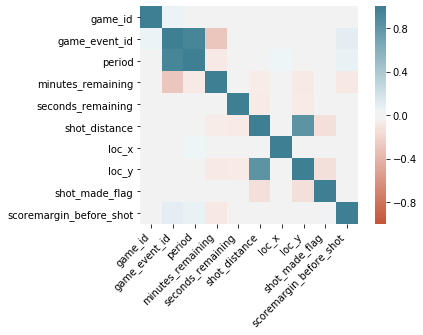

In [20]:
import seaborn as sns
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [27]:
df.head(20)

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season_type,scoremargin_before_shot
0,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,2009-10-28,GSW,HOU,Regular Season,2.0
1,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,2009-10-28,GSW,HOU,Regular Season,0.0
2,20900015,53,Stephen Curry,1,6,2,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,0,2009-10-28,GSW,HOU,Regular Season,-4.0
3,20900015,141,Stephen Curry,2,9,49,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,0,2009-10-28,GSW,HOU,Regular Season,-4.0
4,20900015,249,Stephen Curry,2,2,19,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,0,2009-10-28,GSW,HOU,Regular Season,0.0
5,20900015,277,Stephen Curry,2,0,34,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,4,39,15,0,2009-10-28,GSW,HOU,Regular Season,4.0
6,20900015,413,Stephen Curry,4,10,26,Pullup Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-64,149,1,2009-10-28,GSW,HOU,Regular Season,-9.0
7,20900015,453,Stephen Curry,4,6,31,Pullup Jump shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,17,118,123,1,2009-10-28,GSW,HOU,Regular Season,-6.0
8,20900015,487,Stephen Curry,4,2,25,Pullup Jump shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,20,121,162,1,2009-10-28,GSW,HOU,Regular Season,-9.0
9,20900015,490,Stephen Curry,4,1,47,Pullup Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-125,134,1,2009-10-28,GSW,HOU,Regular Season,-7.0


In [76]:
def wrangle(X):
    X = X.copy()
    
    #from the correlation matrix I can see that loc_y and shot distance have a strong correlation.
    #I will make a new column from these 2 and erase them with wrangle.
#     X[''] = 
    
    #I will make another column to denote whether GSW was the hometeam or not
    X['gsw_hometeam'] = X['htm'] == 'GSW'
    
    #I will also separate columns by months and years
    X['year_played'] = X['game_date'].dt.year
    X['month_played'] = X['game_date'].dt.month
    X['day_played'] = X['game_date'].dt.day
    X = X.drop(columns='game_date')
    
    #I will make a new column from minutes and seconds to possibly cluster around period if I have the time.
    X['total_seconds_remaining'] = (X['minutes_remaining']*60) + X['seconds_remaining']
    X=X.drop(columns=['minutes_remaining','seconds_remaining'])
    
    #I will drop columns that seem random at first glance.
    random = ['game_id', 'game_event_id']
    X=X.drop(columns=random)
    
    #previous shot succesful
    #X['total_seconds_remaining'] = (X['minutes_remaining']*60) + X['seconds_remaining']
    
    #Total time remaining in the game
    
    
    #Constant throughout the data
    constant = ['player_name']
    X=X.drop(columns=constant)
    
    
    return X


train_wrangle = wrangle(train)
test_wrangle = wrangle(test)
cv_wrangle = wrangle(cv_train)

In [77]:
train_wrangle.describe()

,period,shot_distance,loc_x,loc_y,shot_made_flag,scoremargin_before_shot,year_played,month_played,day_played,total_seconds_remaining
count,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000
mean,2.411952,17.376929,0.034697,129.651318,0.473835,1.479304,2014.146869,5.502000,15.231366,313.339783
std,1.127172,10.233256,123.350863,101.856489,0.499335,10.176925,2.455262,4.140516,8.939882,201.571776
min,1.000000,0.000000,-250.000000,-41.000000,0.000000,-39.000000,2009.000000,1.000000,1.000000,0.000000
25%,1.000000,8.000000,-92.000000,23.000000,0.000000,-5.000000,2013.000000,2.000000,7.000000,143.000000
50%,2.000000,21.000000,1.000000,139.000000,0.000000,1.000000,2015.000000,4.000000,14.000000,298.000000
75%,3.000000,25.000000,94.000000,216.000000,1.000000,8.000000,2016.000000,11.000000,23.000000,478.000000
max,6.000000,83.000000,247.000000,811.000000,1.000000,43.000000,2018.000000,12.000000,31.000000,713.000000


## **4. Decide how to validate** your model. 

>Choose one of the following options. Any of these options are good. You are not graded on which you choose.
>
>- **Train/validate/test split: train on the 2009-10 season through 2016-17 season, validate with the 2017-18 season.** You'll know you've split the data correctly when your train set has 11,081 observations, and your validation set has 1,168 observations.
>- **Train/validate/test split: random 80/20%** train/validate split.
>- **Cross-validation** with independent test set. You may use any scikit-learn cross-validation method.

In [78]:
from sklearn.model_selection import train_test_split
target = 'shot_made_flag'

train, val = train_test_split(train_wrangle, test_size=.2, stratify=train[target], random_state=7)

X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]

In [138]:
X_test = test_wrangle.drop(columns=target)
y_test = test_wrangle[target]

## 5. Use a scikit-learn pipeline to encode categoricals and fit a Decision Tree or Random Forest model.

In [135]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    RandomForestClassifier(n_estimators=100, random_state=7, n_jobs=-1)
)
pipeline.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['action_type', 'shot_type',
                                     'shot_zone_basic', 'shot_zone_area',
                                     'shot_zone_range', 'htm', 'vtm',
                                     'season_type'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                        

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform
from sklearn.feature_selection import SelectKBest
pipeline2 = Pipeline(steps=[('encoder', ce.OneHotEncoder(use_cat_names=True)),
    ('kbest', SelectKBest(k = 'all')),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=7, n_jobs=-1))]
)
X_cv = cv_wrangle.drop(columns=target)
y_cv = cv_wrangle[target]
param_distributions = {
#    'targetencoder__min_samples_leaf': randint(1, 1000), 
#    'targetencoder__smoothing': uniform(1, 1000), 
#    'simpleimputer__strategy': ['mean', 'median'], 
    #'preprocessor__num__imputer__strategy': ['mean', 'most_frequent'],
    'kbest__k': range(1, len(X_train.columns)+1),
    #'preprocessor__kbest__k': range(5,7),
    'classifier__n_estimators': randint(100, 300), 
    'classifier__max_depth': [10, 20, 30], 
    'classifier__max_features': uniform(0, 1),
    #'classifier__min_depth': uniform(0, .5)
}
search = RandomizedSearchCV(
    pipeline2, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=3, 
    #scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_cv, y_cv);
print('Best hyperparameters', search.best_params_)
print('Cross-validation accuracy', -search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:    9.5s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   10.3s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   12.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.4s finished


Best hyperparameters {'classifier__max_depth': 10, 'classifier__max_features': 0.4616423613314601, 'classifier__n_estimators': 167, 'kbest__k': 3}
Cross-validation accuracy -0.6411951996081313


In [125]:
pipeline2 = search.best_estimator_

## 6.Get your model's validation accuracy

> (Multiple times if you try multiple iterations.)

In [136]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.6481632653061224


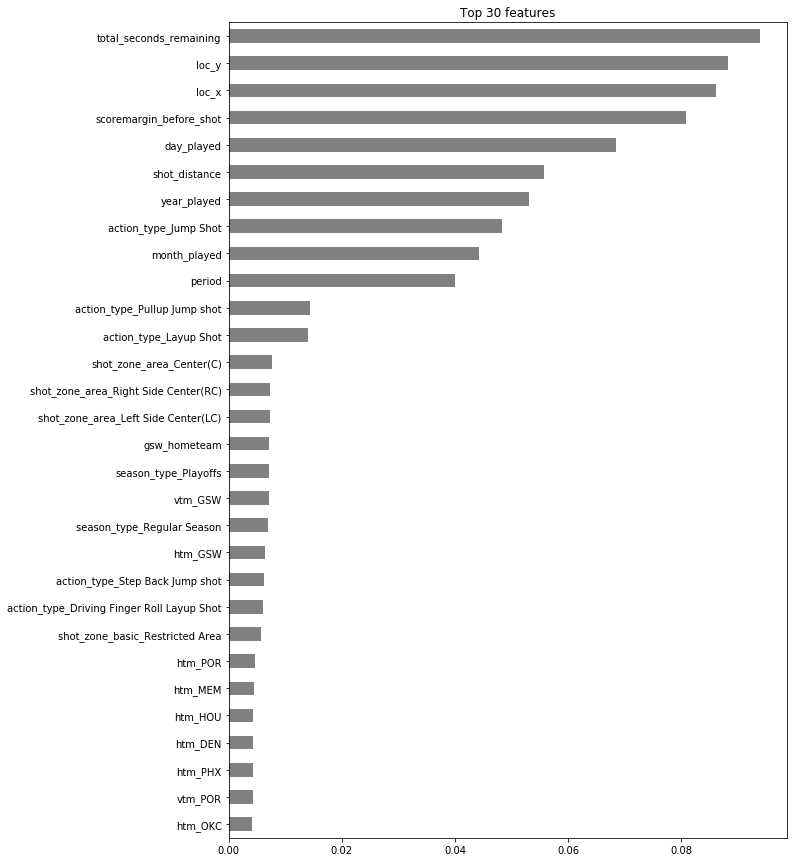

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt

encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(X_train)
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot feature importances
n = 30
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [126]:
y_pred = pipeline2.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.6579591836734694


## 7. Get your model's test accuracy

> (One time, at the end.)

In [142]:
y_pred = pspeline2.predict(X_test)
print('Validation Accuracy', accuracy_score(y_test, y_pred))

Validation Accuracy 0.6143943826799297


## 8. Given a confusion matrix, calculate accuracy, precision, and recall.

Imagine this is the confusion matrix for a binary classification model. Use the confusion matrix to calculate the model's accuracy, precision, and recall.

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">85</td>
    <td style="border: solid">58</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">8</td>
    <td style="border: solid"> 36</td>
  </tr>
</table>

### Calculate accuracy 

In [86]:
85+36

121

In [90]:
positive_accuracy = 36/121
positive_accuracy

0.2975206611570248

In [91]:
negative_accuracy = 85/121
negative_accuracy

0.7024793388429752

### Calculate precision

In [92]:
36+58

94

In [94]:
positive_precision = 36/94
positive_precision

0.3829787234042553

In [95]:
negative_precision = 58/94
negative_precision

0.6170212765957447

### Calculate recall

In [96]:
8+36

44

In [ ]:
positive_recall = 36/36
positive_recall

In [97]:
85+58

143

In [98]:
negative_recall = 58/143
negative_recall

0.40559440559440557